#Task 1

Implement nonlinear Transformation functions:
<ol>
<li> Log Transformation </li>
<li> Power-law Transformation </li>
</ol>

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

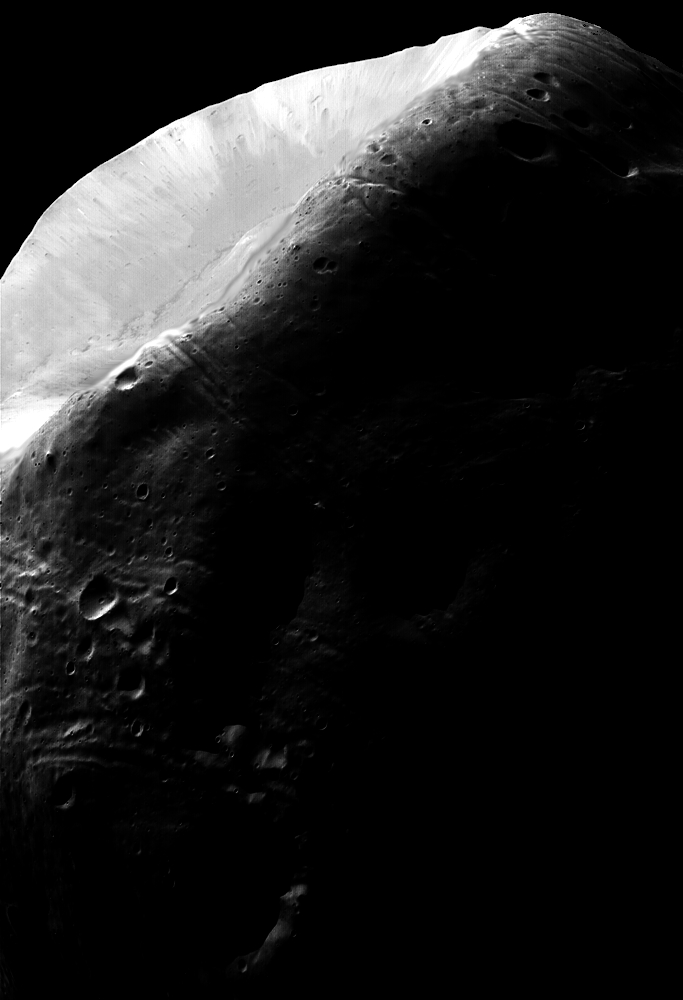

In [20]:
# Load an image
img = Image.open('/mnt/Work/Lab_Tasks/DIP/DIP3E_Original_Images_CH03/Fig0323(a)(mars_moon_phobos).tif')
img

In [21]:
def log_transform(gray_image):
  #implement this function
  gray_image = np.asarray(gray_image)
  gray_image = gray_image.astype(np.float32)
  log_image = np.log(gray_image+1)
  min_val = np.min(log_image)
  max_val = np.max(log_image)
  log_image = (log_image-min_val)/(max_val-min_val)*255

  log_image = log_image.astype(np.uint8)
  log_image = Image.fromarray(log_image)


  return log_image

def power_transform(gray_image, gamma):
  #implement this function
  gray_image = np.asarray(gray_image)
  gray_image = gray_image.astype(np.float32)
  power_image = np.power(gray_image, gamma)
  min_val = np.min(power_image)
  max_val = np.max(power_image)
  power_image = (power_image-min_val)/(max_val-min_val)*255
  power_image = power_image.astype(np.uint8)
  power_image = Image.fromarray(power_image)


  return power_image


# Task 1: Output and Analysis
Use your previously implemented functions to show the outputs of log transform and power transform on a sample image. Provide your analysis on the following topics:
<ol>
<li> Which function is suitable for which type of images? </li>

<li> Why is intensity scaling required before display? </li>

<li> Inverse Log: If you wanted to compress the dark intensity values and expand the bright intensity values (the opposite of the standard Log transformation), what kind of transformation function would you need? Describe its shape. </li>

</ol>

/tmp/ipykernel_30172/2691658685.py:20: RuntimeWarning: divide by zero encountered in power
  power_image = np.power(gray_image, gamma)
/tmp/ipykernel_30172/2691658685.py:23: RuntimeWarning: invalid value encountered in divide
  power_image = (power_image-min_val)/(max_val-min_val)*255
/tmp/ipykernel_30172/2691658685.py:24: RuntimeWarning: invalid value encountered in cast
  power_image = power_image.astype(np.uint8)


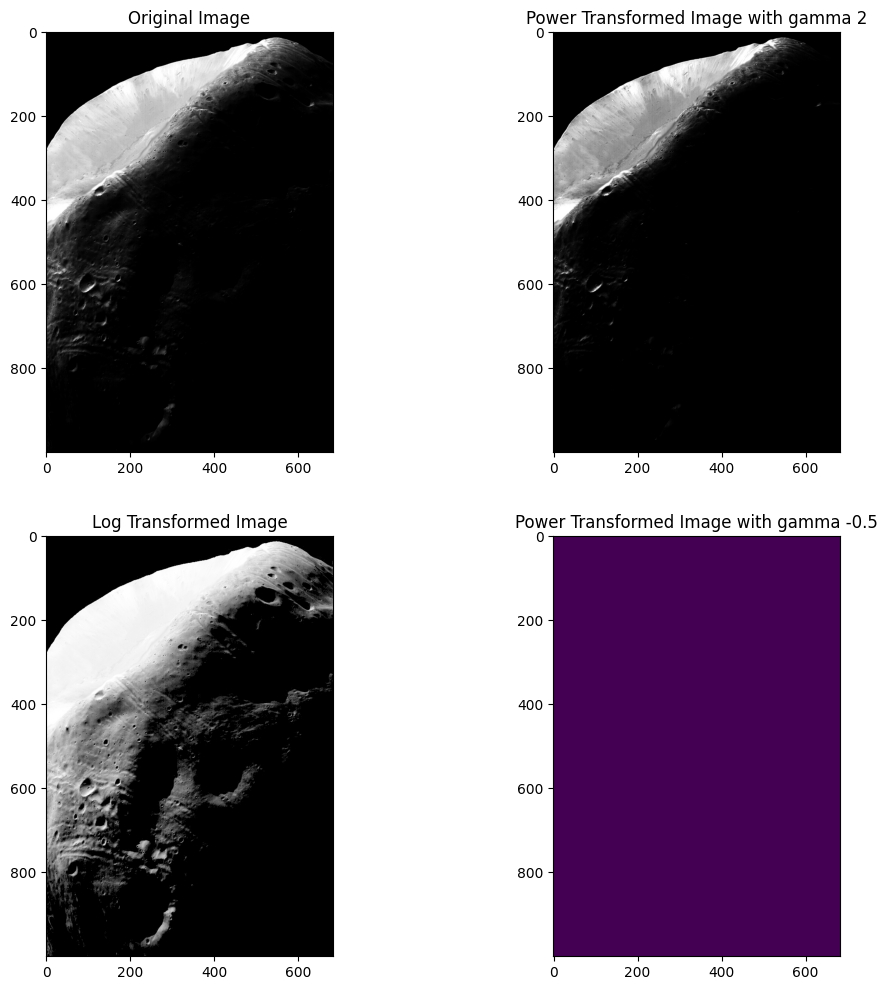

In [22]:
# Generate outputs for Task 1 here
os.makedirs('output_images', exist_ok=True)

log_transformed = log_transform(img)
power_transformed_with_gamma2 = power_transform(img, 2)
power_transformed_with_gamma_neg0_5 = power_transform(img, -0.5)
power_transformed_with_gamma_5 = power_transform(img, 5)

# Save the transformed images
log_transformed.save('output_images/log_transformed.png')
power_transformed_with_gamma2.save('output_images/power_gamma_2.png')
power_transformed_with_gamma_neg0_5.save('output_images/power_gamma_neg0_5.png')
power_transformed_with_gamma_5.save('output_images/power_gamma_5.png')

# For different values of gamma to demonstrate power_transformed
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(2, 2, 2)
plt.title('Power Transformed Image with gamma 2')
plt.imshow(power_transformed_with_gamma2, cmap='gray')

plt.subplot(2,2,3)
plt.title('Log Transformed Image')
plt.imshow(log_transformed, cmap='gray')

plt.subplot(2,2,4)
plt.title('Power Transformed Image with gamma -0.5')
plt.imshow(power_transformed_with_gamma_neg0_5)

plt.savefig('output_images/task1_plots.png')
plt.show()

# Task 2
Implement Global Histogram Equalization on gray-scale images

In [23]:
def global_HistEqual(image):
    image = np.asarray(image).astype(np.uint8)

    # Convert to grayscale if RGB
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Histogram
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    # PDF
    image_size = image.shape[0] * image.shape[1]
    pdf = hist / image_size

    # CDF
    cdf = np.cumsum(pdf)

    # Scale CDF to range 0–255
    cdf_upscaled = np.round(cdf * 255).astype(np.uint8)

    # ---------------- Pixel-by-pixel mapping ----------------
    new_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            old_val = image[i][j]        # original pixel intensity
            new_val = cdf_upscaled[old_val]  # mapped intensity
            new_image[i][j] = new_val
    # ---------------------------------------------------------

    # Save individual plots
    plt.figure()
    plt.bar(range(256), hist, width=1, color='black')
    plt.title("Histogram")
    plt.savefig('output_images/global_histogram.png')
    plt.close()

    plt.figure()
    plt.bar(range(256), pdf, width=1, color='black')
    plt.title("PDF")
    plt.savefig('output_images/global_pdf.png')
    plt.close()

    plt.figure()
    plt.plot(cdf)
    plt.title("CDF")
    plt.savefig('output_images/global_cdf.png')
    plt.close()

    # ------------------- Plots -------------------
    plt.figure(figsize=(18, 12))

    # Histogram
    plt.subplot(2, 3, 1)
    plt.title("Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.bar(range(256), hist, width=1, color='black')

    # PDF
    plt.subplot(2, 3, 2)
    plt.title("PDF")
    plt.xlabel("Pixel Value")
    plt.ylabel("Probability")
    plt.bar(range(256), pdf, width=1, color='black')

    # Original Image
    plt.subplot(2, 3, 3)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    # CDF
    plt.subplot(2, 3, 4)
    plt.title("CDF")
    plt.xlabel("Pixel Value")
    plt.ylabel("Cumulative Probability")
    plt.plot(cdf)

    # Equalized Image
    plt.subplot(2, 3, 5)
    plt.title("Equalized Image")
    plt.imshow(new_image, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.savefig('output_images/global_hist_plots.png')
    plt.show()
    # ---------------------------------------------

    return hist, bins, pdf, cdf, new_image

# Task 2: Output and Analysis
Use your previously implemented function to show the output of global histogram equalization on a sample image.

Plot the Histogram of the equalized image.

Plot the CDF of the output image.

Provide your analysis on the following topic:
<ol>
<li> Why repeated application of Histogram Equalization doesn't produce any further improvements on output images? </li>

<li>Image Types: Describe an image type (based on its histogram) for which Global Histogram Equalization would be highly beneficial, and one for which it would be detrimental?</li>
</ol>

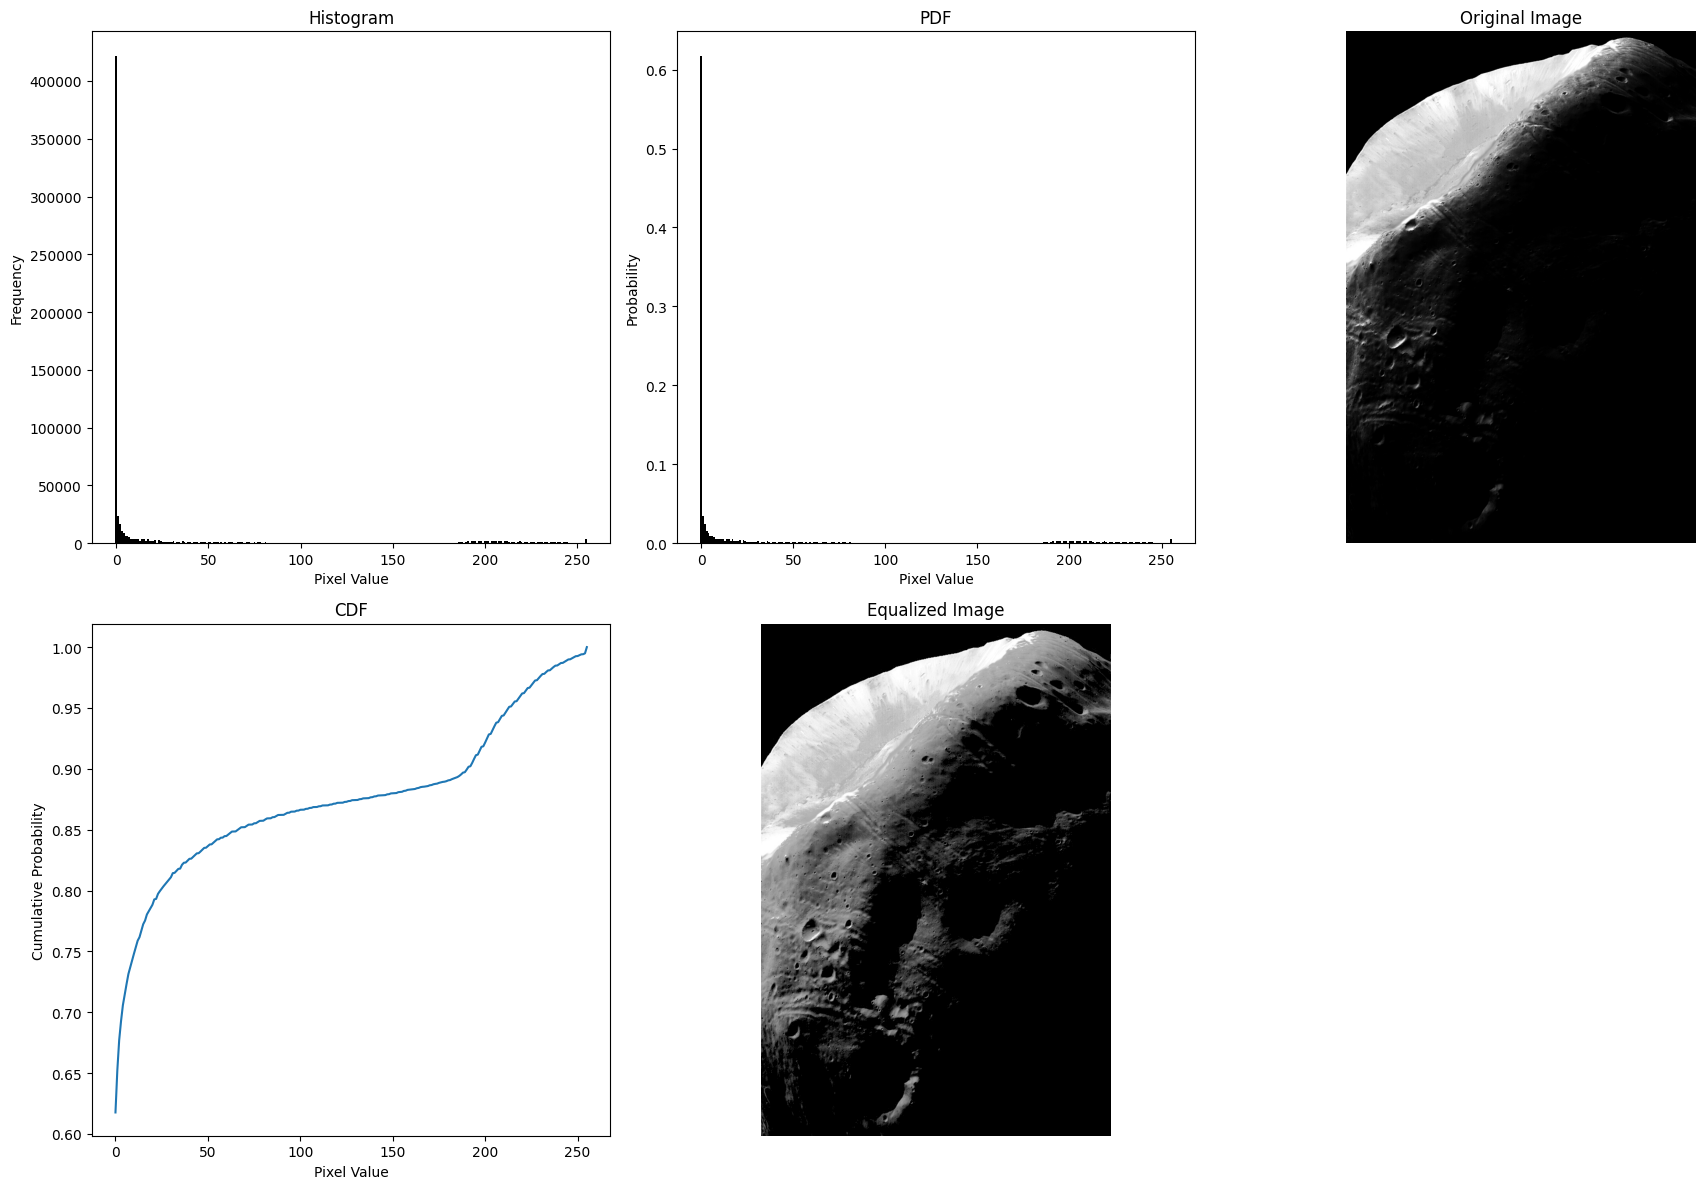

In [24]:
#Generate output for Task 2 here
os.makedirs('output_images', exist_ok=True)

# Save the original image
img.save('output_images/task2_original.png')

hist , bin , pdf, cdf, new_image = global_HistEqual(img)

# Save the equalized image
Image.fromarray(new_image).save('output_images/global_histogram_equalized.png')

# Task 3

Implement Local Histogram Equalization (LHE) on gray scale images.


In [25]:
def local_HistEqual(gray_image, size, stride):
  # Convert input to a NumPy array first
  gray_image_np = np.asarray(gray_image)

  # Check if it's a 3-channel image (e.g., RGB from PIL)
  if len(gray_image_np.shape) == 3:
        # Convert to grayscale. PIL images are typically RGB, so use COLOR_RGB2GRAY
        gray_image = cv2.cvtColor(gray_image_np, cv2.COLOR_RGB2GRAY)
  else:
        # If it's already grayscale (e.g., 2D array), just use it
        gray_image = gray_image_np

  # Ensure the image is of type uint8
  gray_image = gray_image.astype(np.uint8)

  height, width = gray_image.shape

  local_equalized_image = np.zeros_like(gray_image, dtype=np.float32)
  count_matrix = np.zeros_like(gray_image, dtype=np.float32)

  half = size // 2

  # Slide window
  for i in range(0, height - size + 1, stride):
      for j in range(0, width - size + 1, stride):

          window = gray_image[i:i+size, j:j+size]

          hist, _ = np.histogram(window.flatten(), 256, [0, 256])

          pdf = hist / (size * size)

          cdf = np.cumsum(pdf)

          cdf_upscaled = np.round(255 * (cdf - cdf.min()) / (cdf.max() - cdf.min() + 1e-5)).astype(np.uint8)

          equalized_window = np.zeros_like(window)

          for x in range(size):
              for y in range(size):
                  old_val = window[x, y]
                  equalized_window[x, y] = cdf_upscaled[old_val]

          local_equalized_image[i:i+size, j:j+size] += equalized_window
          count_matrix[i:i+size, j:j+size] += 1

  count_matrix[count_matrix == 0] = 1

  local_equalized_image = local_equalized_image / count_matrix
  local_equalized_image = local_equalized_image.astype(np.uint8)

  # Calculate histogram, PDF, and CDF for the final equalized image
  hist_eq, bins_eq = np.histogram(local_equalized_image.flatten(), 256, [0, 256])
  image_size_eq = local_equalized_image.shape[0] * local_equalized_image.shape[1]
  pdf_eq = hist_eq / image_size_eq
  cdf_eq = np.cumsum(pdf_eq)

  return local_equalized_image, hist_eq, pdf_eq, cdf_eq

# Task 3: Output and Analysis
Use your previously implemented function to show the output of local histogram equalization on a sample image. Provide your analysis on the following topic:
<ol>
<li> Why do you have annoying side effects at the boundary of local image regions? </li>
<li> What is the effect of changing the stride? </li>
<li>Comparison to GHE: Compare the scenarios where LHE provides superior results over GHE. In general, why is LHE better at enhancing images where the illumination is non-uniform (e.g., a spotlight on a dark object)?</li>
</ol>

In [26]:
img = Image.open('/mnt/Work/Lab_Tasks/DIP/DIP3E_Original_Images_CH03/Fig0326(a)(embedded_square_noisy_512).tif')

# Save the original image for Task 3
img.save('output_images/task3_original.png')

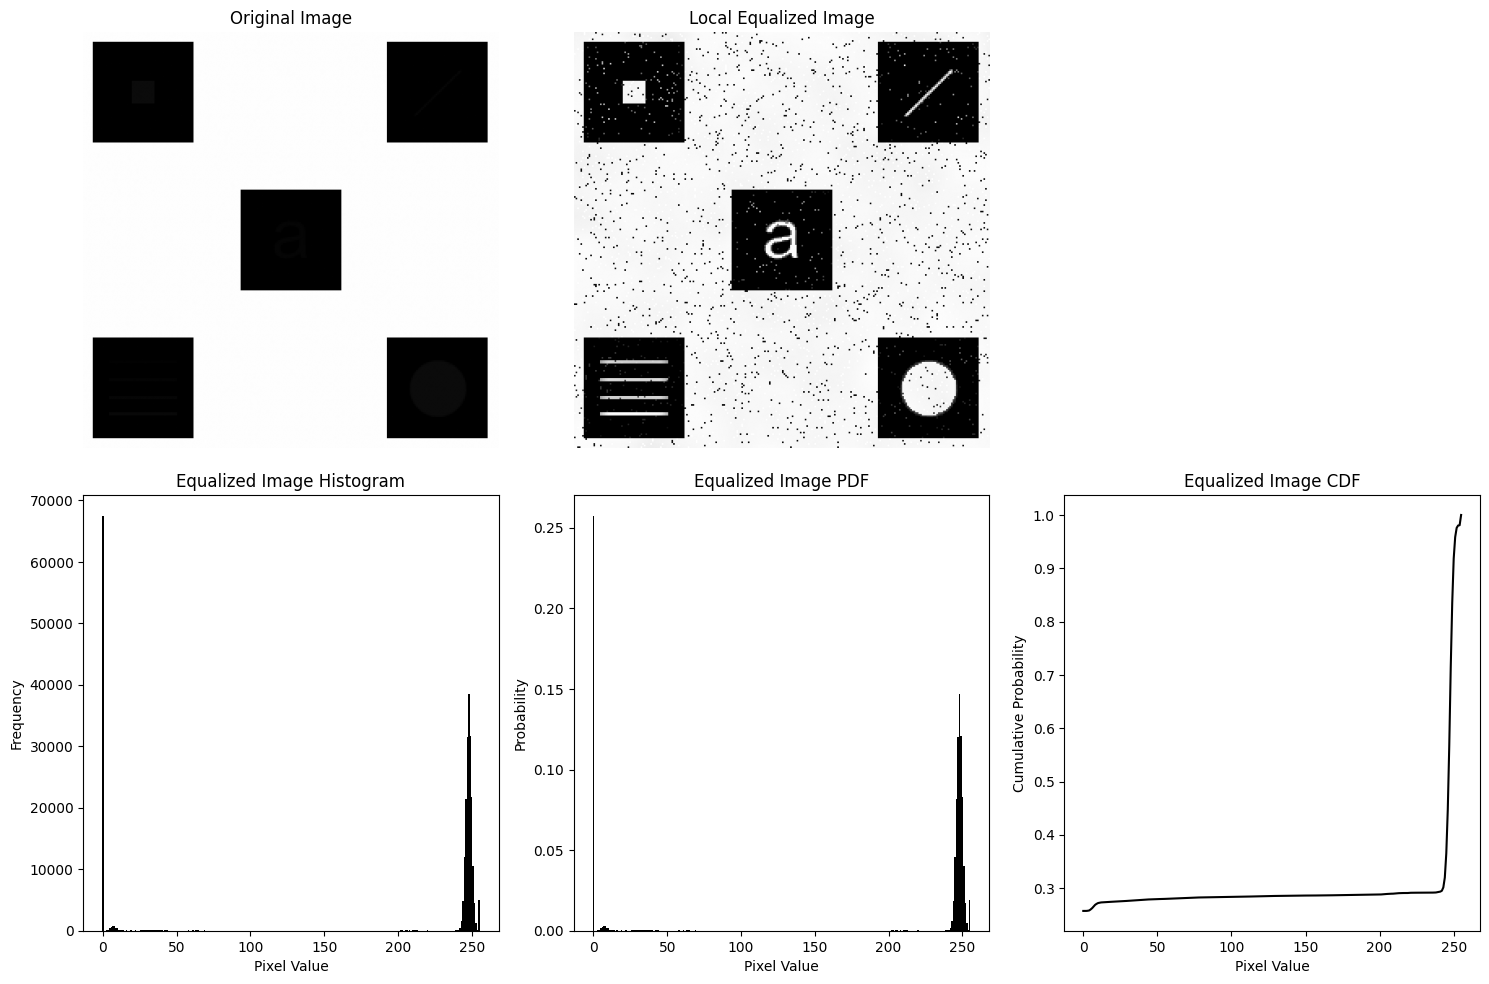

In [27]:
size = 32
stride = 2

local_equalized_image, hist_eq, pdf_eq, cdf_eq = local_HistEqual(img, size, stride)

# Save the local equalized image
os.makedirs('output_images', exist_ok=True)
Image.fromarray(local_equalized_image).save('output_images/local_histogram_equalized.png')

# Save individual plots
plt.figure()
plt.bar(range(256), hist_eq, width=1, color='black')
plt.title("Local Histogram")
plt.savefig('output_images/local_histogram.png')
plt.close()

plt.figure()
plt.bar(range(256), pdf_eq, width=1, color='black')
plt.title("Local PDF")
plt.savefig('output_images/local_pdf.png')
plt.close()

plt.figure()
plt.plot(cdf_eq)
plt.title("Local CDF")
plt.savefig('output_images/local_cdf.png')
plt.close()

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Local Equalized Image')
plt.imshow(local_equalized_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Equalized Image Histogram')
plt.bar(range(256), hist_eq, width=1, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
plt.title('Equalized Image PDF')
plt.bar(range(256), pdf_eq, width=1, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Probability')

plt.subplot(2, 3, 6)
plt.title('Equalized Image CDF')
plt.plot(cdf_eq, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Probability')

plt.tight_layout()
plt.savefig('output_images/local_hist_plots.png')
plt.show()